## Index:-

#### 1. Read super_covid19.csv
####    2. Filter Super_covid19 dataset from start date 2020.6.1(Monday) to 2021.1.3(Sunday).
####    3. Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state".
####    4. Compare the data against other states (compare against 5 states).  Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?
####    5. Identify five counties within a state of your choice with high cases and death rates.
####    6. Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern?

## 1. Read super_covid19.csv

In [70]:
import pandas as pd

super_covid19=pd.read_csv('super_covid19_dataframe.csv')
print("(Rows, Columns)=",super_covid19.shape)

(Rows, Columns)= (3142, 2535)


## 2. Super_covid19 dataset from start date 2020.6.1(Monday) to 2021.1.3(Sunday).

In [71]:
columns_2020 = [col for col in super_covid19.columns
                   if ('_cases' in col or '_deaths' in col) and '2020-06-01' <= col.split('_')[0] <= '2021-01-03']

print(len(columns_2020))
superdata_2020=super_covid19[columns_2020]
additional_columns = super_covid19[['countyFIPS','County Name', 'State','StateFIPS','population']] # Select additional columns that are essential for the dataset
superdata_2020=pd.concat([additional_columns,superdata_2020], axis=1) # Concatenate the additional columns with the filtered 2020 data
print("(Rows, Columns)=",superdata_2020.shape)

superdata_2020.head()

434
(Rows, Columns)= (3142, 439)


,countyFIPS,County Name,State,StateFIPS,population,2020-06-01_cases,2020-06-02_cases,2020-06-03_cases,2020-06-04_cases,2020-06-05_cases,...,2020-12-25_deaths,2020-12-26_deaths,2020-12-27_deaths,2020-12-28_deaths,2020-12-29_deaths,2020-12-30_deaths,2020-12-31_deaths,2021-01-01_deaths,2021-01-02_deaths,2021-01-03_deaths
0,1001,Autauga County,AL,1,55869,233,238,239,241,248,...,46,46,47,47,47,48,48,50,50,50
1,1003,Baldwin County,AL,1,223234,292,292,292,293,296,...,151,151,152,152,156,160,161,169,169,169
2,1005,Barbour County,AL,1,24686,172,175,177,177,183,...,32,32,32,32,32,32,32,33,33,33
3,1007,Bibb County,AL,1,22394,76,76,76,76,76,...,42,42,42,42,42,46,46,46,46,46
4,1009,Blount County,AL,1,57826,63,63,63,63,64,...,58,58,58,58,58,63,63,63,63,63


## 3. Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state".

## `COVID Cases`:

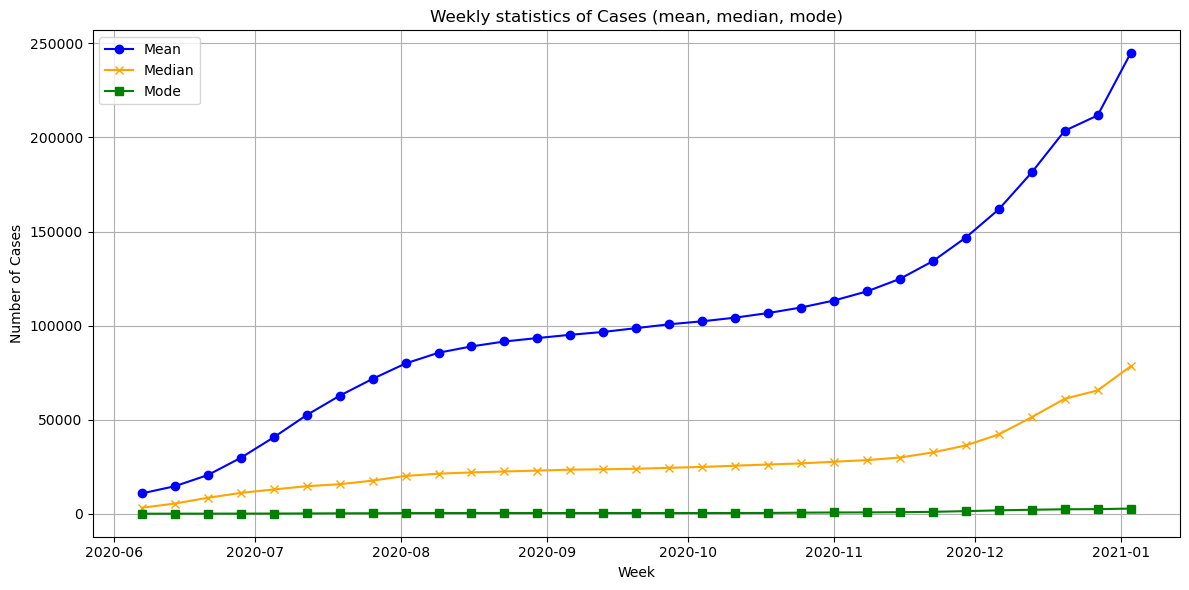

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#StateFIPS = 4 and State = 'Arizona'
state_data = superdata_2020[superdata_2020['StateFIPS'] == 4] 

# Selecting case columns
cases_columns = [col for col in state_data.columns if col.endswith('_cases')]
cases_columns.sort()

# Transform the data to weekly format
cases_weekly_data = state_data[cases_columns].T 
cases_weekly_data.index = cases_weekly_data.index.str.replace('_cases', '')
cases_weekly_data.index = pd.to_datetime(cases_weekly_data.index)

# Resampling weekly and summing the cases
weekly_cases = cases_weekly_data.resample('W').sum()
#weekly_cases.columns = ['County1', 'County2', 'County3', 'County4', 'County5', 'County6','County7', 'County8', 'County9','County10','County11','County12','County13','County14','County15']

# print(weekly_cases)
# Calculating mean, median, and mode
mean_value = weekly_cases.mean(axis=1)
median_value = weekly_cases.median(axis=1)
mode_value = stats.mode(weekly_cases, axis=1, keepdims=False)
mode_value = mode_value.mode.flatten()

# Plotting the mean, median, and mode
plt.figure(figsize=(12, 6))
plt.plot(weekly_cases.index, mean_value, label='Mean', color='blue', marker='o')
plt.plot(weekly_cases.index, median_value, label='Median', color='orange', marker='x')
plt.plot(weekly_cases.index, mode_value, label='Mode', color='green', marker='s')

plt.title('Weekly statistics of Cases (mean, median, mode)')
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Observations:
1. **Mean**: The mean, or average number of cases, shows a continuous rise over time.
2. **Median**: The median, which represents the middle value of the dataset, also increases but at a much slower rate compared to the mean.
3. **Mode**: The mode, or the most frequent number of cases reported in a week, remains constant and very low throughout the entire period.

## `COVID Deaths`:

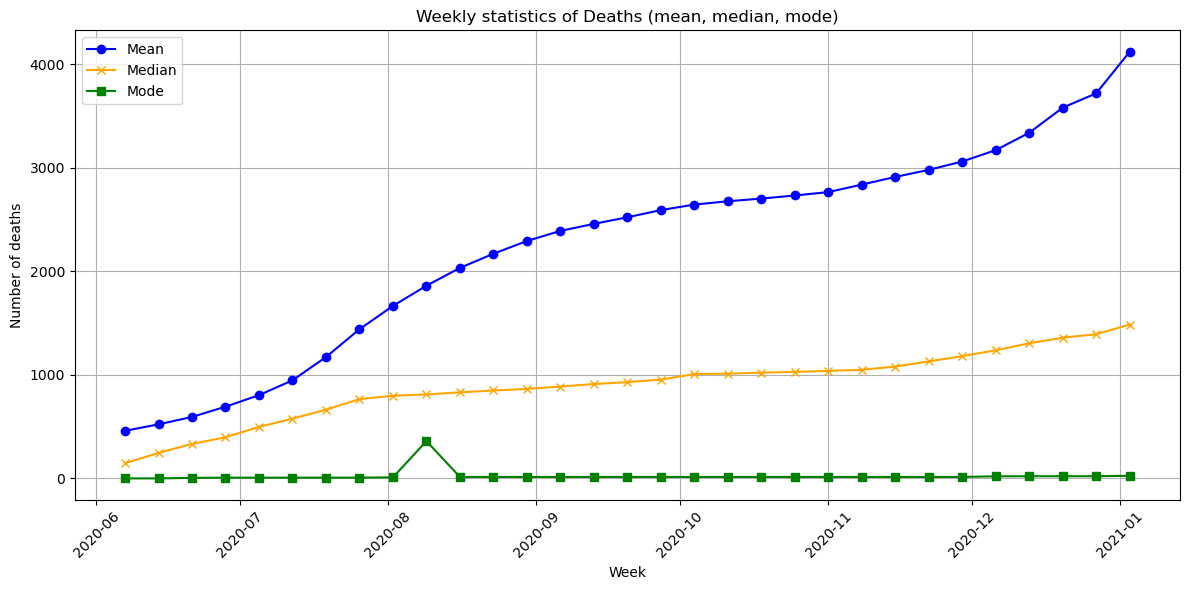

In [73]:
state_data = superdata_2020[superdata_2020['StateFIPS'] == 4] 

# Selecting deaths columns
deaths_columns = [col for col in state_data.columns if col.endswith('_deaths')]
deaths_columns.sort()

# Transform the data to weekly format
deaths_weekly_data = state_data[deaths_columns].T 
deaths_weekly_data.index = deaths_weekly_data.index.str.replace('_deaths', '')
deaths_weekly_data.index = pd.to_datetime(deaths_weekly_data.index)

# Resampling weekly and summing the deaths
weekly_deaths = deaths_weekly_data.resample('W').sum()

# Calculating mean, median, and mode
mean_value = weekly_deaths.mean(axis=1)
median_value = weekly_deaths.median(axis=1)
mode_value = stats.mode(weekly_deaths, axis=1, keepdims=False)
mode_value = mode_value.mode.flatten()

# Plotting the mean, median, and mode
plt.figure(figsize=(12, 6))
plt.plot(weekly_deaths.index, mean_value, label='Mean', color='blue', marker='o')
plt.plot(weekly_deaths.index, median_value, label='Median', color='orange', marker='x')
plt.plot(weekly_deaths.index, mode_value, label='Mode', color='green', marker='s')


plt.title('Weekly statistics of Deaths (mean, median, mode)')
plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Observations:

1. **Mean**: The mean continues to rise throughout the graph, with a sharp upward trend starting around November 2020.
2. **Median**: The median also rises, but at a much slower rate than the mean.
3. **Mode**: The mode remains quite low, indicating that most weeks or regions had consistently low death counts.

## 4. Compare the data against other states (compare against 5 states). Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?

Selected States:
1. AZ
2. CA
3. FL
4. GA
5. NY

## `COVID Cases`:

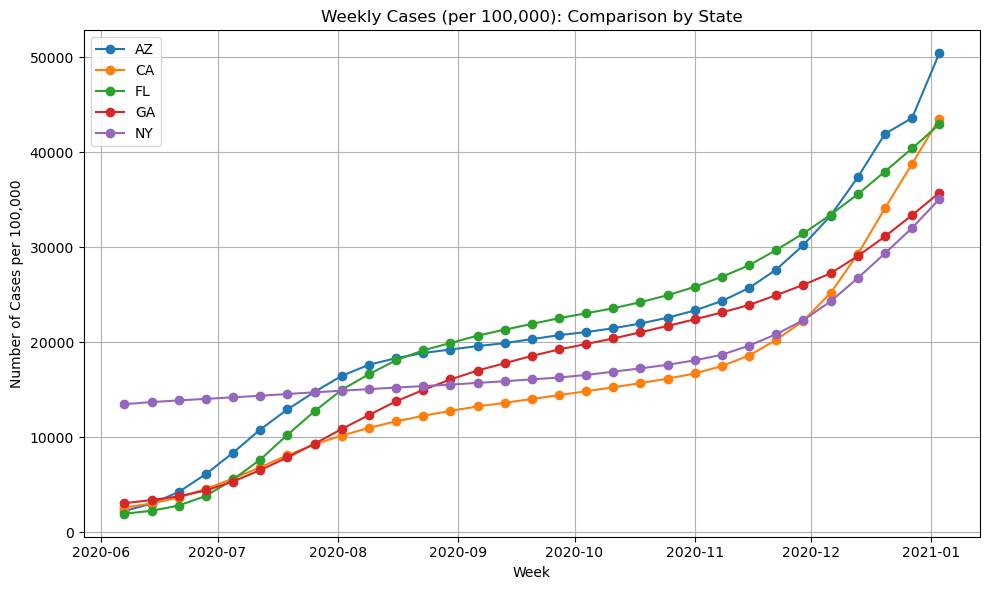

In [74]:
statefips_list = [4, 6, 12, 13, 36] #Selected 5 states

# Filter the data for the selected states
state_data = superdata_2020[superdata_2020['StateFIPS'].isin(statefips_list)]

plt.figure(figsize=(10, 6))

for statefips in statefips_list:
    # Filter the state-specific data
    state_specific_data = state_data[state_data['StateFIPS'] == statefips]
    state_name = state_specific_data['State'].iloc[0]
    
    # Get the population of the state by summing across counties
    population = state_specific_data['population'].sum()

    # Select and sort the columns that represent case data
    cases_columns = [col for col in state_specific_data.columns if col.endswith('_cases')]
    cases_columns.sort()
    state_specific_cases = state_specific_data[cases_columns]

    # Transpose the data to have dates as the index and counties as columns
    cases_weekly_data = state_specific_cases.T
    cases_weekly_data.index = cases_weekly_data.index.str.replace('_cases', '')
    cases_weekly_data.index = pd.to_datetime(cases_weekly_data.index)

    # Resample the data to weekly sums
    weekly_cases = cases_weekly_data.resample('W').sum()

    # Normalize the weekly cases by population (per 100,000 people)
    weekly_cases_normalized = (weekly_cases.sum(axis=1) / population) * 100000

    # Plot the normalized data
    plt.plot(weekly_cases.index, weekly_cases_normalized, label=f'{state_name}', marker='o')
    


plt.title('Weekly Cases (per 100,000): Comparison by State')
plt.xlabel('Week')
plt.ylabel('Number of Cases per 100,000')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## `COVID Deaths`:

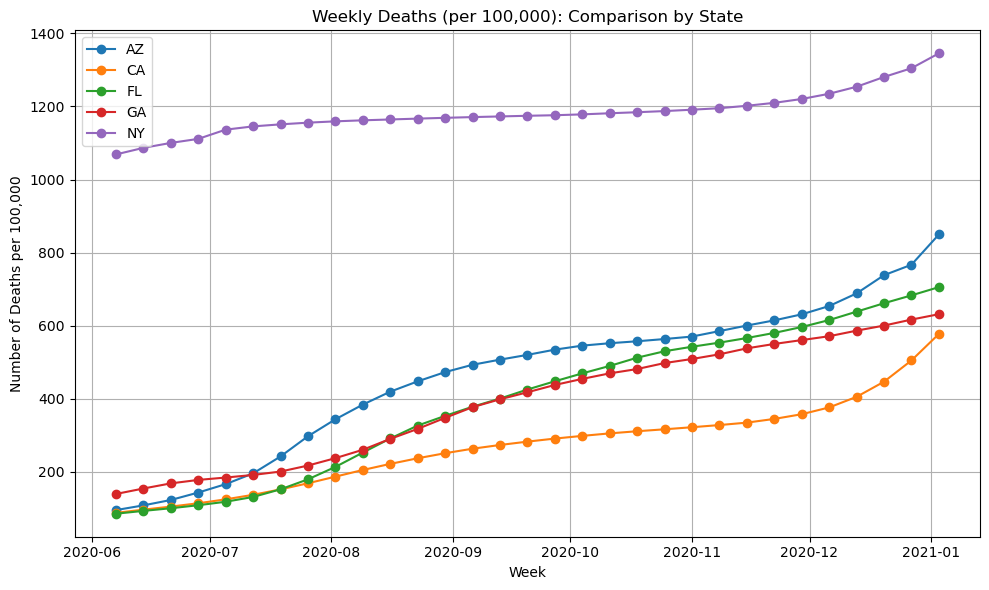

In [75]:
statefips_list = [4, 6, 12, 13, 36]

state_data = superdata_2020[superdata_2020['StateFIPS'].isin(statefips_list)]

plt.figure(figsize=(10, 6))

for statefips in statefips_list:

    state_specific_data = state_data[state_data['StateFIPS'] == statefips]
    state_name = state_specific_data['State'].iloc[0]
    
    # Get the population of the state by summing across counties
    population = state_specific_data['population'].sum()

    # Select and sort the columns that represent death data
    deaths_columns = [col for col in state_specific_data.columns if col.endswith('_deaths')]
    deaths_columns.sort()

    # Extract the case data for the selected state
    state_specific_deaths = state_specific_data[deaths_columns]

    # Transpose the data to have dates as the index and counties as columns
    deaths_weekly_data = state_specific_deaths.T
    deaths_weekly_data.index = deaths_weekly_data.index.str.replace('_deaths', '')
    deaths_weekly_data.index = pd.to_datetime(deaths_weekly_data.index)

    # Resample the data to weekly sums
    weekly_deaths = deaths_weekly_data.resample('W').sum()

    # Normalize the weekly deaths by population (per 100,000 people)
    weekly_deaths_normalized = (weekly_deaths.sum(axis=1) / population) * 100000

    # Plot the normalized data for the state
    plt.plot(weekly_deaths.index, weekly_deaths_normalized, label=f'{state_name}', marker='o')

plt.title('Weekly Deaths (per 100,000): Comparison by State')
plt.xlabel('Week')
plt.ylabel('Number of Deaths per 100,000')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1. Differences in Case Rates Across States
- **Arizona**: Arizona shows the sharpest increase in cases, especially starting around November 2020.
- **California (CA), Florida (FL), and Georgia (GA)**: These states show similar trends but have lower peaks compared to Arizona.vember 2020.
- **New York (NY)**: New York has a significantly lower case rate compared to the other states.
2. Differences in Death Rates Across States
- **New York (NY)**: New York has the highest number of deaths per 100,000.
- **Arizona (AZ)**: Arizona shows a significant increase in death rates starting around October 2020.
- **California (CA), Florida (FL), and Georgia (GA)**: These states follow a similar upward trend, with California and Florida showing the next highest death rates after Arizona.

##### Identifying Peaks and compare with the US pattern
- **Case Peaks**: The peaks in Arizona, California, Florida, and Georgia around November to January align with the national trend of a surge in COVID-19 cases during the fall and winter of 2020 due to increased social interactions and holiday gatherings.
- **Death Peaks**: New York's higher death rate may reflect its earlier experiences during the first wave of the pandemic in 2020. Arizona’s rapid rise in both cases and deaths.

## 5.Identify five counties within a state of your choice with high cases and death rates.

In [76]:
state_data = superdata_2020[superdata_2020['StateFIPS'] == 4] .copy()

cases_columns = [col for col in state_data.columns if col.endswith('_cases')]
deaths_columns = [col for col in state_data.columns if col.endswith('_deaths')]

state_data['total_cases'] = state_data[cases_columns].sum(axis=1)
state_data['total_deaths'] = state_data[deaths_columns].sum(axis=1)

top_5_cases = state_data[['County Name', 'total_cases']].sort_values(by='total_cases', ascending=False).head(5)
top_5_deaths = state_data[['County Name', 'total_deaths']].sort_values(by='total_deaths', ascending=False).head(5)

print("Top 5 counties with high cases: ")
print(top_5_cases)
print('\n\n')
print("Top 5 counties with high deaths: ")
print(top_5_deaths)


Top 5 counties with high cases: 
          County Name  total_cases
103  Maricopa County      30690035
106      Pima County       5552644
110      Yuma County       2789651
107     Pinal County       2365829
105    Navajo County       1305635



Top 5 counties with high deaths: 
          County Name  total_deaths
103  Maricopa County         611918
106      Pima County         121212
110      Yuma County          62978
105    Navajo County          46031
104    Mohave County          42181


## 6. Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern?

**Why we use Log Normalization**: Typically to compress a wide range of values and make patterns more visible.

## `COVID Cases by raw values`:

Top 5 counties with high cases: 
103    Maricopa County 
106        Pima County 
110        Yuma County 
107       Pinal County 
105      Navajo County 
Name: County Name, dtype: object


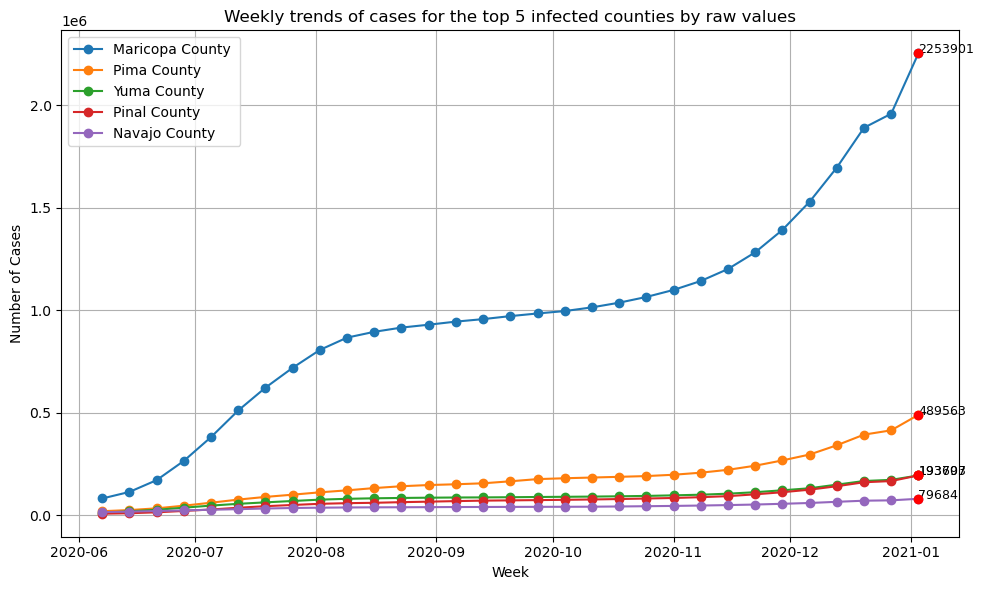

In [77]:
county_list = top_5_cases["County Name"]
print("Top 5 counties with high cases: ")
print(county_list)
# Filter the data for the selected states
state_data = superdata_2020[superdata_2020['County Name'].isin(county_list)]
state_data = state_data[state_data['StateFIPS'] == 4] .copy()
plt.figure(figsize=(10, 6))

for statefips in county_list:
    
    state_specific_data = state_data[state_data['County Name'] == statefips]

    # Get the state name
    state_name = state_specific_data['County Name'].iloc[0]
    cases_columns = [col for col in state_specific_data.columns if col.endswith('_cases')]
    cases_columns.sort()
    state_specific_cases = state_specific_data[cases_columns]

    # Transpose the data to have dates as the index and counties as columns
    cases_weekly_data = state_specific_cases.T
    cases_weekly_data.index = cases_weekly_data.index.str.replace('_cases', '')
    cases_weekly_data.index = pd.to_datetime(cases_weekly_data.index)

    # Resample the data to weekly sums
    weekly_cases = cases_weekly_data.resample('W').sum()
    plt.plot(weekly_cases.index, weekly_cases, label=f'{state_name}', marker='o')
    #Showing Peak point
    peak_value = weekly_cases.max().values[0]
    peak_week = weekly_cases.idxmax().values[0]
    plt.scatter(peak_week, peak_value, color='red', zorder=5)
    plt.text(peak_week, peak_value, peak_value, fontsize=9, color='black')

plt.title('Weekly trends of cases for the top 5 infected counties by raw values')
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations**:
Maricopa County has a much larger number of cases compared to the other counties. This is increase, particularly towards the end of 2020, suggests a significant rise in COVID-19 cases, driven by the winter surge seen in many parts of the U.S. at that time. Other counties such as Pima, Yuma, Pinal, and Navajo experienced increases in cases as well but on a much smaller scale.

## `COVID Cases by log normalized values`:

Top 5 counties with high cases: 
103    Maricopa County 
106        Pima County 
110        Yuma County 
107       Pinal County 
105      Navajo County 
Name: County Name, dtype: object


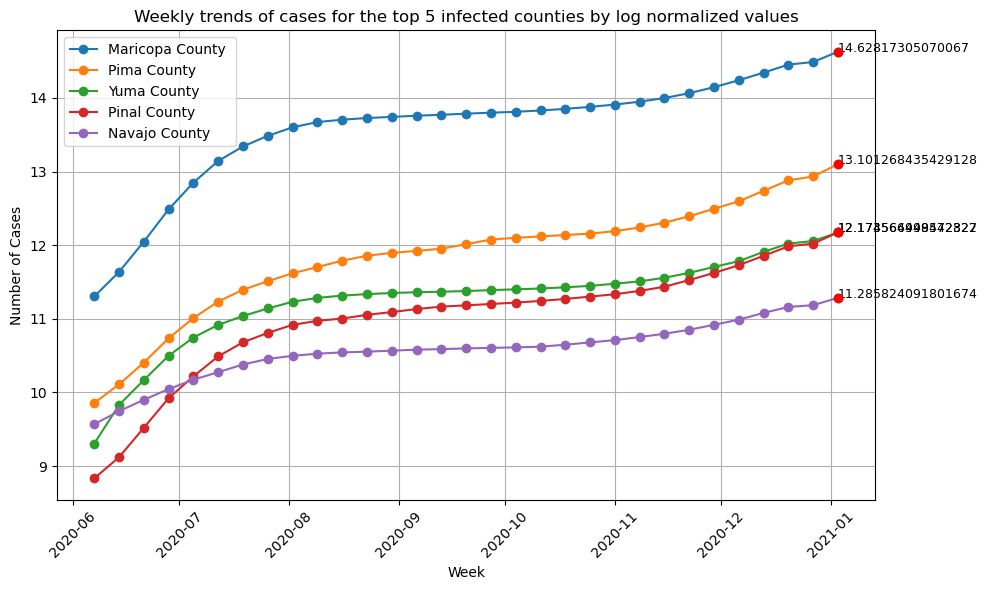

In [78]:
county_list = top_5_cases["County Name"]
print("Top 5 counties with high cases: ")
print(county_list)

state_data = superdata_2020[superdata_2020['County Name'].isin(county_list)]
state_data = state_data[state_data['StateFIPS'] == 4] .copy()
plt.figure(figsize=(10, 6))

for statefips in county_list:

    state_specific_data = state_data[state_data['County Name'] == statefips]
    state_name = state_specific_data['County Name'].iloc[0]
    cases_columns = [col for col in state_specific_data.columns if col.endswith('_cases')]
    cases_columns.sort()

    # Extract the case data for the selected state
    state_specific_cases = state_specific_data[cases_columns]

    # Transpose the data to have dates as the index and counties as columns
    cases_weekly_data = state_specific_cases.T
    cases_weekly_data.index = cases_weekly_data.index.str.replace('_cases', '')
    cases_weekly_data.index = pd.to_datetime(cases_weekly_data.index)

    # Resample the data to weekly sums
    weekly_cases = cases_weekly_data.resample('W').sum()

    # Normalize the weekly cases by log
    weekly_cases_normalized = np.log(weekly_cases)

    # Plot the normalized data for the state
    plt.plot(weekly_cases.index, weekly_cases_normalized, label=f'{state_name}', marker='o')
    #Showing Peak point
    peak_value = weekly_cases_normalized.max().values[0]
    peak_week = weekly_cases_normalized.idxmax().values[0]
    plt.scatter(peak_week, peak_value, color='red', zorder=5)
    plt.text(peak_week, peak_value, peak_value, fontsize=9, color='black')


plt.title('Weekly trends of cases for the top 5 infected counties by log normalized values')
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations**: This normalization highlights the common exponential growth trends that might be obscured when looking at raw data, and suggests that the virus spread across counties in a somewhat similar pattern but at different scales.

Let's find the population of each top 5 counties:

In [79]:
df=superdata_2020[superdata_2020['County Name'].isin(top_5_cases["County Name"])]
df=df[df.StateFIPS==4]
df
df.loc[:,['County Name','population']].sort_values(by=['population'],ascending=[False])

,County Name,population
103,Maricopa County,4485414
106,Pima County,1047279
107,Pinal County,462789
110,Yuma County,213787
105,Navajo County,110924


**What is causing the trends?**
The population of Maricopa County, as Arizona's most populous county, likely contributed to its higher case numbers. Pima, Yuma, Pinal, and Navajo counties also show growth, at smaller scales. These counties are less populated, resulting in fewer cases

**Peaks:**
The clear peak in Maricopa County’s raw cases occurs around late December 2020 to early January 2021. This could be due to holiday travel, increased gatherings, and colder weather.

**State Pattern:**
The trends in these top five counties likely follow the overall state pattern seen in Arizona. Like much of the U.S., Arizona experienced a surge in COVID-19 cases during the summer of 2020 and another significant peak during the winter months of 2020–2021. 

## `COVID Deaths by raw values`:

Top 5 counties with high deaths: 
103    Maricopa County 
106        Pima County 
110        Yuma County 
105      Navajo County 
104      Mohave County 
Name: County Name, dtype: object


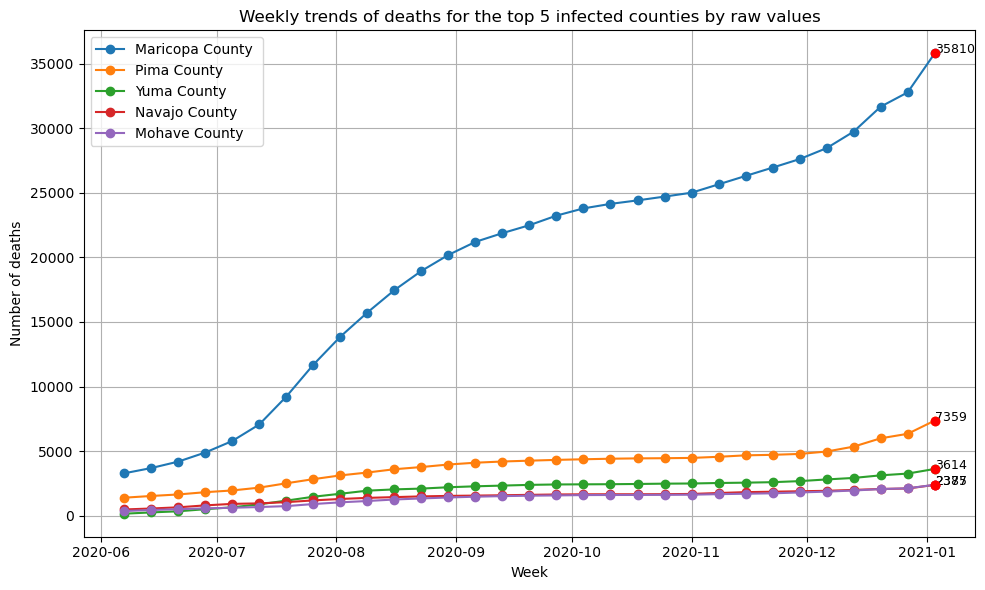

In [80]:
county_list = top_5_deaths["County Name"]
print("Top 5 counties with high deaths: ")
print(county_list)
# Filter the data for the selected states
state_data = superdata_2020[superdata_2020['County Name'].isin(county_list)]
state_data = state_data[state_data['StateFIPS'] == 4] .copy()
plt.figure(figsize=(10, 6))

for statefips in county_list:
    
    state_specific_data = state_data[state_data['County Name'] == statefips]

    # Get the state name
    state_name = state_specific_data['County Name'].iloc[0]
    deaths_columns = [col for col in state_specific_data.columns if col.endswith('_deaths')]
    deaths_columns.sort()
    state_specific_deaths = state_specific_data[deaths_columns]

    # Transpose the data to have dates as the index and counties as columns
    deaths_weekly_data = state_specific_deaths.T
    deaths_weekly_data.index = deaths_weekly_data.index.str.replace('_deaths', '')
    deaths_weekly_data.index = pd.to_datetime(deaths_weekly_data.index)

    # Resample the data to weekly sums
    weekly_deaths = deaths_weekly_data.resample('W').sum()
    plt.plot(weekly_deaths.index, weekly_deaths, label=f'{state_name}', marker='o')
    #Showing Peak point
    peak_value = weekly_deaths.max().values[0]
    peak_week = weekly_deaths.idxmax().values[0]
    plt.scatter(peak_week, peak_value, color='red', zorder=5)
    plt.text(peak_week, peak_value, peak_value, fontsize=9, color='black')

plt.title('Weekly trends of deaths for the top 5 infected counties by raw values')
plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations**: Maricopa County has the highest number of deaths, with a steep and continuous rise from June 2020 to January 2021. Pima, Yuma, Navajo, and Mohave Counties show a much lower number of deaths.

## `COVID Deaths by log normalized values`:

Top 5 counties with high deaths: 
103    Maricopa County 
106        Pima County 
110        Yuma County 
105      Navajo County 
104      Mohave County 
Name: County Name, dtype: object


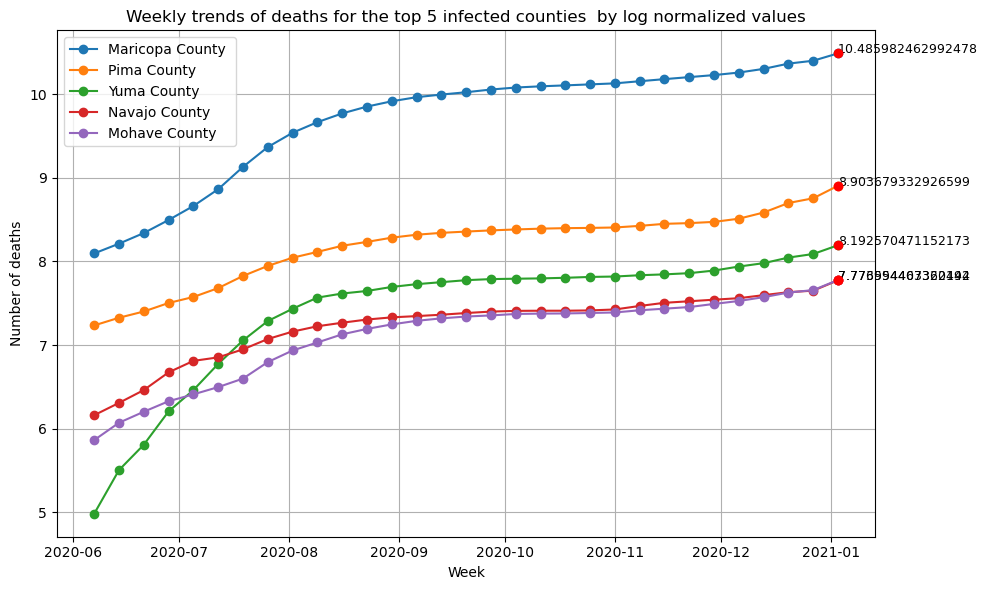

In [81]:
county_list = top_5_deaths["County Name"]
print("Top 5 counties with high deaths: ")
print(county_list)
# Filter the data for the selected states
state_data = superdata_2020[superdata_2020['County Name'].isin(county_list)]
state_data = state_data[state_data['StateFIPS'] == 4] .copy()
plt.figure(figsize=(10, 6))

for statefips in county_list:
    
    state_specific_data = state_data[state_data['County Name'] == statefips]

    # Get the state name
    state_name = state_specific_data['County Name'].iloc[0]
    deaths_columns = [col for col in state_specific_data.columns if col.endswith('_deaths')]
    deaths_columns.sort()
    state_specific_deaths = state_specific_data[deaths_columns]

    # Transpose the data to have dates as the index and counties as columns
    deaths_weekly_data = state_specific_deaths.T
    deaths_weekly_data.index = deaths_weekly_data.index.str.replace('_deaths', '')
    deaths_weekly_data.index = pd.to_datetime(deaths_weekly_data.index)

    # Resample the data to weekly sums
    weekly_deaths = deaths_weekly_data.resample('W').sum()
    
    # Normalize the weekly cases by log
    weekly_deaths_normalized = np.log(weekly_deaths)
    
    plt.plot(weekly_deaths.index, weekly_deaths_normalized, label=f'{state_name}', marker='o')
    #Showing Peak point
    peak_value = weekly_deaths_normalized.max().values[0]
    peak_week = weekly_deaths_normalized.idxmax().values[0]
    plt.scatter(peak_week, peak_value, color='red', zorder=5)
    plt.text(peak_week, peak_value, peak_value, fontsize=9, color='black')
    
plt.title('Weekly trends of deaths for the top 5 infected counties  by log normalized values')
plt.xlabel('Week')
plt.ylabel('Number of deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations**: Maricopa and Pima Counties show a consistent increase. Yuma County exhibits significant growth initially but stabilizes later. Navajo and Mohave Counties show similar growth.

**What is causing the trends?**: The rise in deaths corresponds with the winter wave of COVID-19 in late 2020, likely driven by increased transmission during holiday gatherings and colder weather.

**Peaks**: The major peak for Maricopa County was around the end of 2020, while the other counties show smaller, less distinct peaks.

**State Pattern**: The overall trends align with the state’s COVID-19 pattern, where Maricopa County, being the most populous, shows the most significant impact.